In [313]:
import numpy as np
import matplotlib.pyplot as plt

## Activation function

`활성화 함수(Activation function)` : 입력을 받아 수학적 변환을 수행하고 출력을 생성하는 함수

활성화 함수는 선형 함수가 아닌 `비선형 함수(Nonlinear function)`

활성화 함수가 선형 함수 처럼 $f(x) = Wx$ 형태라 가정하면

은닉층을 추가한다고 해도 $y(x) = f(f(f(x)))$ 와 같은 형태가 되고 이는 $y(x) = W \times W \times W \times x = kx$ 로 표현 가능하면서 은닉층 추가에 따른 차이를 줄 수 없다

다만 선형 함수를 활성화 함수로 사용한 은닉층을 구분하기 위해 `선형층(linear layer)`, `투사층(projection layer)`이라는 표현을 사용하기도 함

## Sigmoid / Logistic

시그모이드 / 로지스틱 활성화 함수는 가장 널리 사용되는 함수 중 하나

확률을 출력으로 예측하는 모델에 일반적으로 사용, 출력 범위가 0 ~ 1 사이

미분가능한 매끄러운 함수로 출력값의 점프를 방지함

S자 형태의 그래프를 가짐

$ Sigmoid / Logistic $

$ f(x) = \frac{1}{1 + e^{-x}} $

$ f'(x) = sigmoid(x) \times (1 - sigmoid(x)) $

In [314]:
# 시그모이드
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

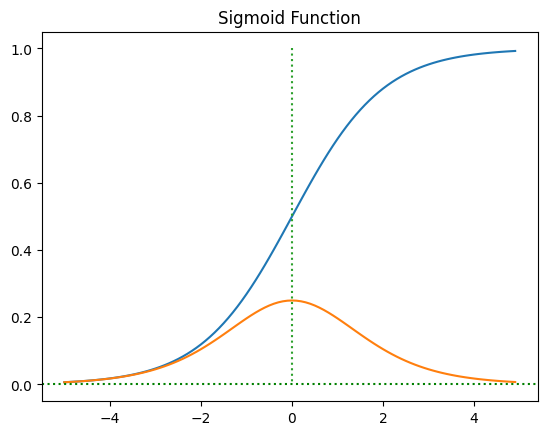

In [315]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
g = sigmoid(x) * (1 - sigmoid(x))

plt.plot(x, y)
plt.plot(x, g)
plt.plot([0,0],[1.0,0.0], ':')
plt.axhline(y=0, color='green', linestyle=':')
plt.title('Sigmoid Function')
plt.show()

그래프에서 알 수 있듯 3이상 -3이하의 경우 함수의 기울기가 매우 작음

기울기가 0에 가까워짐에 따라 딥러닝에서 앞단에 기울기가 잘 전달되지 않게 됨 이를 `기울기 소실(Vanishing Gradient)` 문제라 함

즉 시그모이드 함수를 사용하는 은닉층의 개수가 다수가 될 경우에는 0에 가까운 기울기가 계속 곱해지면 앞단에서는 거의 기울기를 전파받을 수 없게 되고 매개변수 W가 업데이트가 되지않아 학습이 진행되지 않음

시그모이드 함수의 출력은 0을 기준으로 대칭이 아니기 때문에 모든 뉴런의 출력은 양수의 값을 가짐, 이는 신경망 훈련을 어렵고 불안정하게 만듬

## Hyperbolic tangent(tanh)

하이퍼볼릭 탄젠트 함수는 시그모이드 함수와 유사한 S자 형태의 그래프

출력 범위가 -1 ~ 1로 시그모이드와 차별됨

출력이 0 이 중심으로 대칭되어, 출력값을 부정, 중립, 긍정으로 매핑가능함

일반적으로 값이 -1에서 사이에 있으므로 신경망의 은닉층에 사용됨

은닉층의 평균은 0 또는 매우 가까운 값으로 나오며, 데이터를 중앙에 배치하는 데 도움이 되고 다음 레이어에 대한 학습이 훨씬 쉬워짐

$ Tanh $

$ f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $

$ f'(x) = 1 - tanh^2(x) $

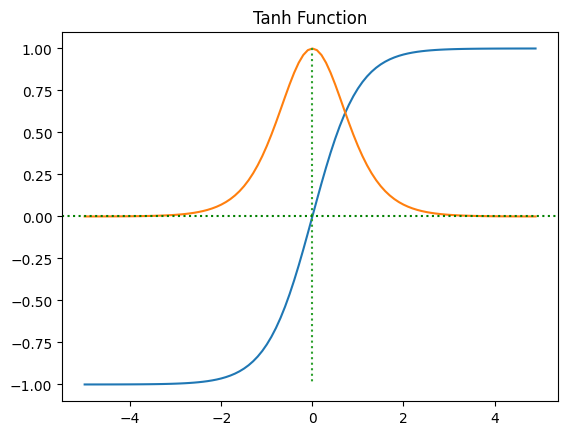

In [316]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)
g = 1 - (np.tanh(x) * np.tanh(x))

plt.plot(x, y)
plt.plot(x, g)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='green', linestyle=':')
plt.title('Tanh Function')
plt.show()

시그모이드 함수와 같이 기울기 소실 문제가 있음

tanh 함수의 기울기는 시그모이드 함수에 비해 훨씬 더 가파르기 때문에 시그모이드 보단 기울기 소실 증상이 적은 편

두 함수 모두 기울기 소실 문제가 있지만, tanh 함수는 중심이 0이고 기울기를 특정 방향으로 이동하도록 제한하지 않기에 시그모이드보다 선호됨

## ReLU

인공 신경망에서 가장 널리 많이 쓰이는 활성화 함수, ReLU는 Rectified Linear Unit을 뜻함

음수 입력시 0, 양수 입력시 값을 그대로 반환함

렐루 함수는 특정 양수값에 수렴하지 않으므로 딥러닝에서 시그모이드 함수보다 훨씬 더 잘 작동

시그모이드 함수와 하이퍼볼릭 탄젠트 함수와 같이 어떤 연산이 필요한 것이 아니라 단순 임계값이므로 연산 속도가 빠름

선형, 비포화 특성으로 비용 함수의 전역 최소값을 향한 경사하강법 수렴을 가속화 함

렐루 함수는 모든 뉴런을 동시에 활성화하지 않음 변환의 출력이 0보다 작은 경우에만 뉴런이 비활성화

따라서 특정 뉴런만 활성화 되므로 계산상 훨씬 효율적임

$ ReLU $

$ f(x) = max(0, x) $

$ 
f'(x) = 
\begin{cases}
    0 & \text{if } x < 0 \\
    1 & \text{if } x > 0
\end{cases}
$

In [317]:
def relu(x):
    return np.maximum(0, x)

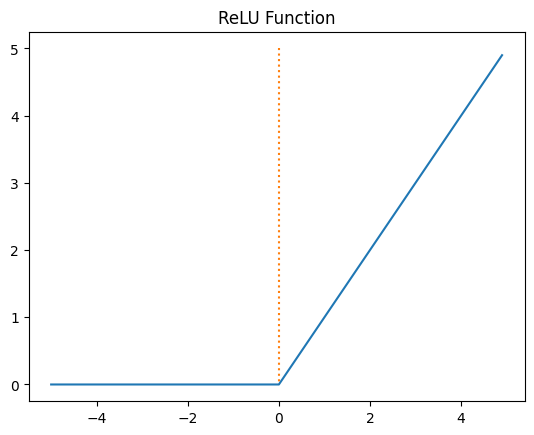

In [318]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('ReLU Function')
plt.show()

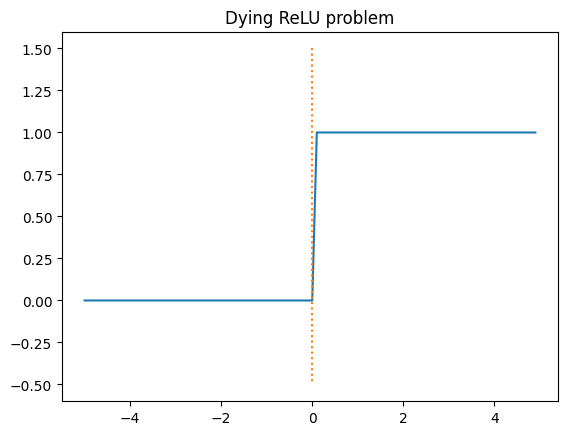

In [319]:
def dying_relu(x):
    return np.where(x > 0, 1, 0)

x = np.arange(-5.0, 5.0, 0.1)
y = dying_relu(x)

plt.plot(x, y)
plt.plot([0,0],[1.5,-0.5], ':')
plt.title('Dying ReLU problem')
plt.show()

입력값이 음수면 기울기도 0이 됨, 따라서 이 뉴런은 다시 회생하는 것이 매우 어려움

이를 `죽은 렐루(dying ReLU)` 문제라 함

이 경우 모델이 데이터를 적절하게 피팅하거나 학습하는 능력을 감소시킴

## Leaky ReLU / Parametric ReLU

`Dying ReLU` 문제를 해결하기 위해 ReLU 함수를 개선한 버전

Leaky ReLU 함수는 음의 역역에서 0.01의 기울기를 가짐

Leaky ReLU 함수가 죽은 뉴런 문제를 해결하는 데 여전히 실패하고 관련 정보가 다음 계층으로 성공적으로 전달되지 않을 때 사용

음의 영역에서 작은 양의 기울기 a를 가짐, 이 기울기는 하이퍼파라미터로 Leaky('새는') 정도를 결정

Leaky ReLU의 장점은 음수 입력 값에 대해서도 역전파가 가능하다는 점 외에는 ReLU와 동일

매개변수 a의 값에 따라 다양한 문제에 대해 다르게 수행될 수 있음

$ Leaky \, ReLU / Parametric \, ReLU $

$ f(x) = max(\alpha x, x) $

$ 
f'(x) = 
\begin{cases}
    \alpha & \text{if } x < 0 \\
    1 & \text{if } x > 0
\end{cases}
$

In [320]:
# 그래프로 잘 보이도록 0.1로 설정
a = 0.1
def leaky_relu(x):
    return np.maximum(a*x, x)
def leaky_relu_derivative(x):
    return np.where(x > 0, 1, a)

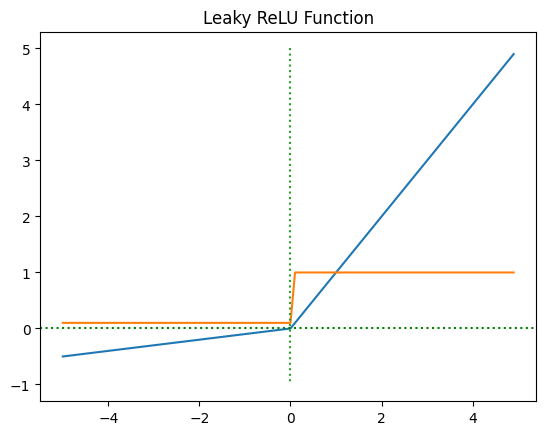

In [321]:
x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)
g = leaky_relu_derivative(x)

plt.plot(x, y)
plt.plot(x, g)
plt.plot([0,0],[5.0,-1.0], ':')
plt.axhline(y=0, color='green', linestyle=':')
plt.title('Leaky ReLU Function')
plt.show()

음수 입력 값에 대해서는 예측이 일관되지 않을 수 있음

음수 값의 기울기는 모델 매개변수 학습에 시간이 많이 걸리는 작은 값

## ELU

지수 선형 단위(Exponential Linear Unit, ELU)

ReLU의 변형으로 함수의 음수 부분의 기울기에 차이점

앞선 ReLU와 달리 로그 곡선을 사용하여 음수 값을 정의

ReLU의 대안책 중 하나로 출력이 -a가 될때까지 천천히 부드러워 진다

입력의 음수 값에 대한 로그 곡선을 도입하여 데드 ReLU 문제를 방지

가중치와 편향을 올바른 방향으로 이동하는 데 도움을 줄 수 있음

$ ELU $

$ 
f(x) = 
\begin{cases}
    x & \text{if } x \geq 0 \\
    \alpha(e^x - 1) & \text{if } x < 0
\end{cases}
$

$ 
f'(x) = 
\begin{cases}
    1 & \text{if } x \geq 0 \\
    f(x) + \alpha & \text{if } x < 0
\end{cases}
$

In [322]:
a = 1.0
def elu(x):
    return np.where(x >= 0, x, a * (np.exp(x) - 1))
def elu_derivative(x):
    return np.where(x >= 0, 1, elu(x) + a)

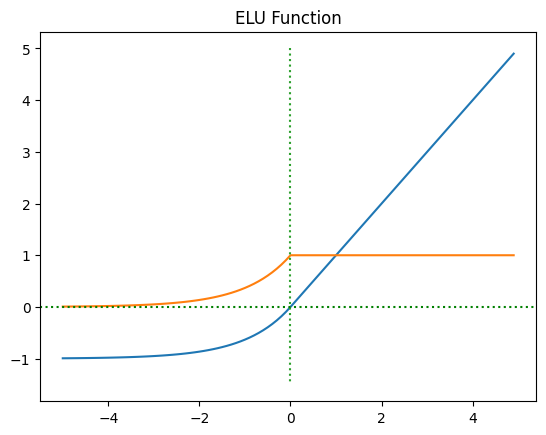

In [323]:
x = np.arange(-5.0, 5.0, 0.1)
y = elu(x)
g = elu_derivative(x)

plt.plot(x, y)
plt.plot(x, g)
plt.plot([0,0],[5.0,-1.5], ':')
plt.axhline(y=0, color='green', linestyle=':')
plt.title('ELU Function')
plt.show()

지수 연산이 포함되어 ReLU와 달리 계산 시간이 증가

a값에 대한 학습은 발생하지 않음

기울기 소실과 반대로, 기울기가 입력층으로 갈수록 점차 커지다가 가중치들이 비정상적으로 큰 값이 되면서 발산되는 현상인 `기울기 폭주(Exploding Gradient)` 문제가 발생할 수 있음

## Softamx

은닉층에서 ReLU(또는 ReLU 변형) 함수들을 사용하는 것이 일반적이지만

분류 문제의 경우 로지스틱 회귀와 소프트맥스 회귀를 출력층에 적용하여 사용

소프트맥스 함수는 시그모이드 함수처럼 출력층의 뉴런에서 주로 사용

시그모이드 함수가 두 가지 선택지 중 하나를 고르는 이진 분류 (Binary Classification) 문제에 사용된다면

세 가지 이상의 (상호 배타적인) 선택지 중 하나를 고르는 다중 클래스 분류(MultiClass Classification) 문제에 주로 사용

$ Softmax $

$ f(z_i) = \frac{exp(z_i)}{\sum_{j}{}exp(z_j)} $

In [324]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

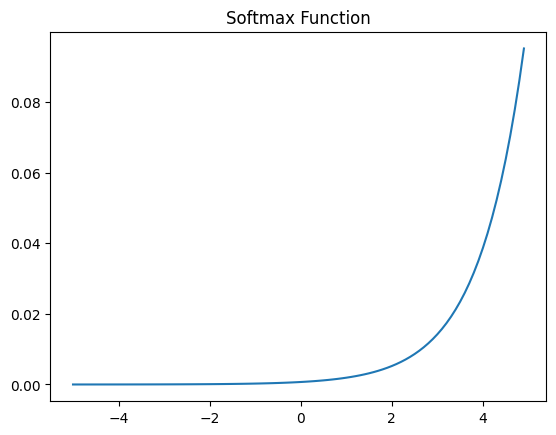

In [325]:
x = np.arange(-5.0, 5.0, 0.1)
y = softmax(x)

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

## Swish

Google 연구진이 개발한 셀프 게이트 활성화 함수

이미지 분류, 기계 번역 등과  같은 다양한 까다로운 도메인에 적용되는 심층 네트워크에서 ReLU 활성화 기능과 일관되게 일치하거나 더 나은 성능을 발휘

일반적으로 40개 이상의 레이어를 가진 신경망에 사용

ReLU 와 그 파생형과 달리 x=0 부근에서 연속한 부드러운 함수

단조롭지 않은 swish 함수는 입력 데이터와 학습할 가중치의 표현을 향상

$ Swish $

$ f(x) = \frac{x}{1 + e^{-x}} = x \times sigmoid(x)$

In [326]:
def swish(x):
    return x / (1 + np.exp(-x))

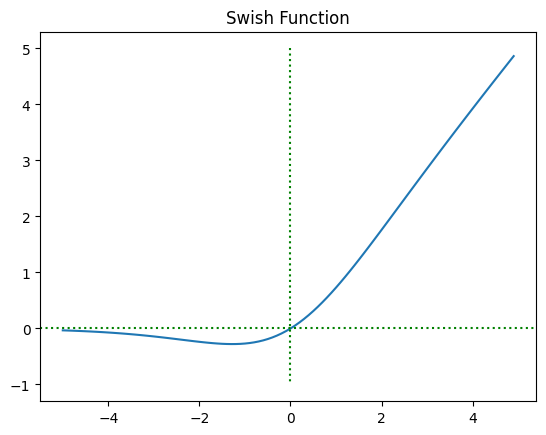

In [327]:
x = np.arange(-5.0, 5.0, 0.1)
y = swish(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,-1.0], color='green', linestyle=':')
plt.axhline(y=0, color='green', linestyle=':')
plt.title('Swish Function')
plt.show()

## GELU

GELU(Gaussian Error Linear Unit) 활성화 함수는 BERT, ROBERTa, ALBERT 및 기타 상위 NLP 모델과 호환

이 활성화 함수는 드롭아웃, 존아웃 및 ReLU의 속성에서 유래되었음

GELU 비선형성은 ReLU 및 ELU 활성화보다 우수하며 컴퓨터 비전 , 자연어 처리 및 음성 인식 영역의 모든 작업에서 성능 향상을 보임

$ GELU $

$ f(x) = xP(X \leq x) = x \Phi (x) $

$ = 0.5x(1 + tanh[\sqrt{2/\pi}(x + 0.044715x^3)]) $

In [328]:
def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

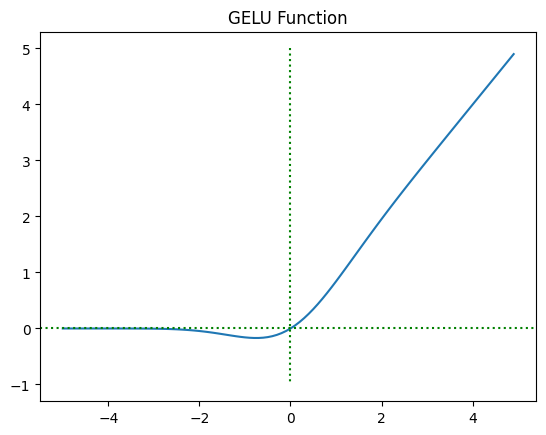

In [329]:
x = np.arange(-5.0, 5.0, 0.1)
y = gelu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,-1.0], color='green', linestyle=':')
plt.axhline(y=0, color='green', linestyle=':')
plt.title('GELU Function')
plt.show()

## SELU

Scaled Exponential Linear Unit(SELU) 는 자체 정규화 네트워크에서 정의되었으며 내부 정규화를 처리

각 레이어가 이전 레이어의 평균과 분산을 유지한다는 의미로 SELU는 평균과 분산을 조정하여 이러한 정규화를 가능하게 함

SELU는 평균을 이동하기 위해 양수 값과 음수 값을 모두 가지고 있음

기울기를 사용하여 분산을 조정할 수 있음, 활성화 함수를 늘리려면 기울기가 1보다 큰 영역이 필요

내부 정규화는 외부 정규화보다 빠르며 이는 네트워크가 더 빠르게 수렴됨을 의미

SELU는 상대적으로 새로운 활성화 기능이며 CNN 및 RNN과 같은 아키텍처에 대한 더 많은 논문이 필요

$ SELU $

$ 
f(x) = \lambda 
\begin{cases}
    \alpha (e^x - 1) & \text{if } x < 0 \\
    x & \text{if } x \geq 0
\end{cases}
$

In [330]:
a = 1.6733
l = 1.0507
def selu(x):
    return l * np.where(x > 0, x, a * (np.exp(x) - 1))

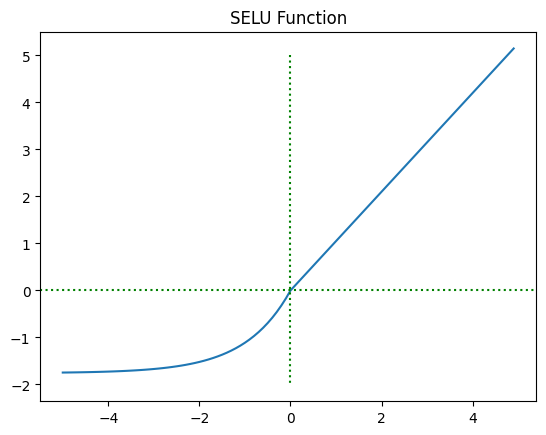

In [331]:
x = np.arange(-5.0, 5.0, 0.1)
y = selu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,-2.0], color='green', linestyle=':')
plt.axhline(y=0, color='green', linestyle=':')
plt.title('SELU Function')
plt.show()

## 활성화 함수의 선택

ReLU 활성화 함수는 은닉층에서만 사용

시그모이드/로지스틱 및 Tanh 함수는 학습 중 모델이 문제에 더 취약해지므로 은닉층에 사용을 지양

Swish 함수는 40개 이상의 레이어를 갖는 신경망에서 사용

문제 유형에 따라 출력층에 다음과 같은 활성화 함수 사용
- 회귀 : 선형 활성화 함수
- 이진 분류 : Sigmoid
- 다중 클래스 분류 : Softmax
- 다중 라벨 분류 : Sigmoid

신경망 아키텍처 유형에 따라 은닉층에 다음과 같은 활성화 함수 사용
- CNN(Convolutional Neural Network) : ReLU
- RNN(Recurrent Neural Network) : Tanh or Sigmoid

결과에 따라 함수를 변경하여 사용